In [60]:
import numpy as np
import sep

In [89]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Ellipse

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

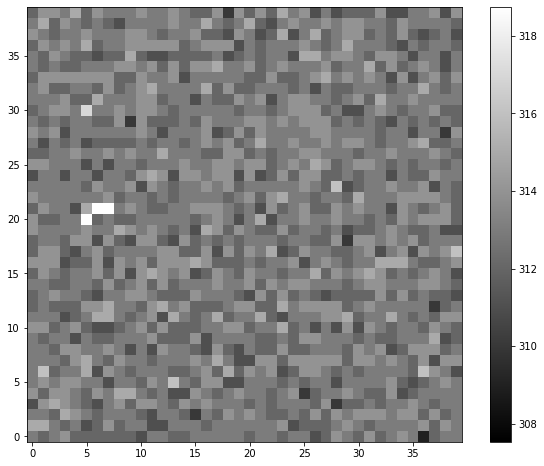

In [90]:
fits_image_filename = fits.util.get_testdata_filepath('test0.fits')
hdul = fits.open(fits_image_filename)
data = hdul[1].data
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

In [91]:
data = data.byteswap().newbyteorder().astype(unit16)
bkg = sep.Background(data, bw=64, bh=64, fw=3, fh=3)
print(bkg.globalback)
print(bkg.globalrms)
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
data_sub = data - bkg

NameError: name 'unit16' is not defined

In [92]:
data_sub = data - bkg
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
len(objects)

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)


NameError: name 'bkg' is not defined

In [93]:
objects.dtype.names
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],3.0, err=bkg.globalrms, gain=1.0)
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

NameError: name 'objects' is not defined